<h1>Увеличение количества пользователей с подпиской сервиса аренды самокатов GoFast

**Описание задачи**
<br>Нам передали данные популярного сервиса аренды самокатов GoFast о некоторых пользователях из нескольких городов, а также об их поездках. Требуется проанализировать эти данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.
<br>Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. 
<br>Сервисом можно пользоваться:

- без подписки
  - абонентская плата отсутствует;
  - стоимость одной минуты поездки — 8 рублей;
  - стоимость старта (начала поездки) — 50 рублей;
- с подпиской Ultra
  - абонентская плата — 199 рублей в месяц;
  - стоимость одной минуты поездки — 6 рублей;
  - стоимость старта — бесплатно.

<br>**Описание данных**
<br>В основных данных есть информация о пользователях, их поездках и подписках. Есть и дополнительная информация — о количестве обращений пользователей в техподдержку сервиса до и после обновления технической инфраструктуры.
<br>**Пользователи — users_go.csv**
- user_id - уникальный идентификатор пользователя
- name - имя
- age - возраст
- city - город
- subscription_type - тип подписки (без подписки/ультра)

<br>**Поездки — rides_go.csv**
- user_id - уникальный идентификатор пользователя
- distance - расстояние, пройденное за поездку в метрах
- duration - продолжительность поездки в минутах
- date - дата поездки в формате год/месяц/число

<br>**Подписки — subscriptions_go.csv**
- subscription_type - наименование подписки (без подписки/ультра)
- minute_price - цена за минуту поездки
- start_ride_price - цена за начало поездки
- subscription_fee - цена подписки

#### Шаг 1. Загрузка данных

Считаем CSV-файлы с данными и изучим общую информацию о них:

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [2]:
users_go = pd.read_csv('/datasets/users_go.csv')
rides_go = pd.read_csv('/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users_go.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
rides_go.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


<br>**Вывод**
<br>После ознакомления со всеми таблицами можно заметить, что тип данных в столбце "date" таблицы "rides_go" некорректен. В этой же таблице столбец "user_id" имеет в значении еденицы (по крайней мере для первых десяти строк, в дальнейшей предобработке проверим все остальные), что тоже выглядит довольно странно на первый взгляд. Стоит рассмотреть его повнимательней.
При дальнейшей предобработке так же проверим данные на наличие пропущенных значений и дубликатов и сгруппируем данные помесячно.

#### Шаг 2. Предобработка данных

Приведем столбец "date" к типу даты Pandas

In [9]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

<br>Теперь разберемся со столбцом "user_id"
<br>В прошлый раз при вызове первых десяти строк значения этого столбца были равны одному.
<br>Проверим, есть ли и другие значения

In [10]:
rides_go[rides_go['user_id'] > 1]

,user_id,distance,duration,date
12,2,3105.086678,24.307514,2021-03-15
13,2,3053.519401,11.543256,2021-03-18
14,2,4029.116927,25.109188,2021-03-23
15,2,2805.786329,20.652145,2021-04-08
16,2,3358.595495,18.396489,2021-04-13
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


<br>Иные значения есть и самое крайнее = 1534
<br>Посмотрим на аналогичный столбец в таблице "users_go", а точнее на его крайнее значение

In [11]:
users_go[users_go['user_id'] >= 1534]

,user_id,name,age,city,subscription_type
1533,1534,Альберт,25,Краснодар,free


<br>Крайним значением оказалось то же самое число
<br>Следовательно "user_id" в таблице "rides_go" действительно является уникальным идентификатором, а такое количество повторений лишь указывает на количество поездок одного уникального пользователя.
<br>Идем дальше

Создадим новый столбец с номером месяца на основе столбца "date"

In [12]:
rides_go['month'] = rides_go['date'].dt.month

<br>Теперь проверим данные на наличие пропущенных значений и дубликатов
<br>Таблицу "subscriptions_go" проверять не будем, т.к. в ней всего 2 строки, а сама таблица содержит информацию об условиях пользования сервисом с подпиской или без нее

In [13]:
users_go.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
rides_go.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

<br>Пропущенных значений нет
<br>Проверим наличие дубликатов и при их наличии устраним их

In [15]:
users_go.duplicated().sum()

31

In [16]:
rides_go.duplicated().sum()

0

Удалим дубликаты в таблице "users_go"

In [17]:
users_go = users_go.drop_duplicates()

In [18]:
users_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.9+ KB


Все дубликаты были удалены.
Теперь в таблице "users_go" 1534 строки - ровно столько, сколько уникальных пользователей

**Вывод**
<br>Пропусков в данных не было, а дубликаты были успешно удалены. Нарушений стиля в названиях столбцов не было.
<br>Провели замену формата столбца "date" на datetime64. А так же создали столбец "month", который содержит номера месяца. Он пригодится нам в дальнейшем.
<br>Таким образом имеющиеся данные готовы для дальнейшего анализа.

#### Шаг 3. Исследовательский анализ данных

**3.1 частота встречаемости городов**

Проверим, какие города присутствуют в данных

In [19]:
print(users_go['city'].unique())

['Тюмень' 'Омск' 'Москва' 'Ростов-на-Дону' 'Краснодар' 'Пятигорск'
 'Екатеринбург' 'Сочи']


<br>Всего в данных фигурируют 8 городов. Посмотрим как часто они встречаются

In [20]:
users_go['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

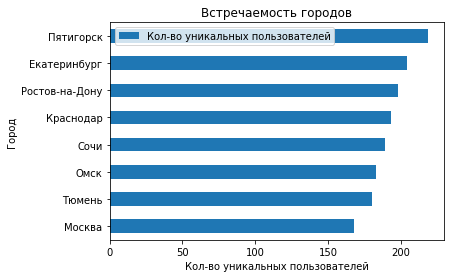

In [21]:
users_go.groupby(by='city')['city'].count().sort_values().plot(y='user_id', kind='barh', label='Кол-во уникальных пользователей');
plt.xlabel('Кол-во уникальных пользователей')
plt.ylabel('Город')
plt.title('Встречаемость городов')
plt.legend(loc='upper left')
plt.show()

<br>Больше всего пользователей из Пятигорска и меньше всего из Москвы
<br>Затрудняюсь предположить, с чем это связано, возможно, в Москеве есть более предпочтительные или более распиаренные аналогичные сервисы аренды самокатов, либо в столице данный вид услуг не так востребован
<br>Но в целом график достаточно плотный и разница между Пятигорском и Москвой всего 51 пользователь

**3.2 соотношение пользователей с подпиской и без подписки**

Посмотрим на соотношение пользователей с подпиской и без подписки

In [22]:
users_go['subscription_type'].value_counts()

free     835
ultra    699
Name: subscription_type, dtype: int64

In [23]:
print(users_go.groupby('subscription_type')['user_id'].count())

subscription_type
free     835
ultra    699
Name: user_id, dtype: int64


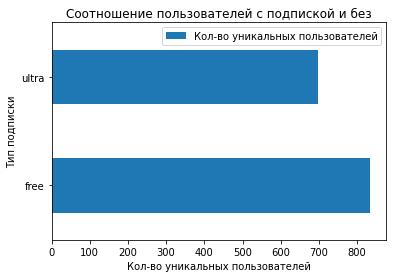

In [24]:
users_go.groupby(by='subscription_type')['subscription_type'].count().plot(y='user_id', kind='barh', label='Кол-во уникальных пользователей');
plt.xlabel('Кол-во уникальных пользователей')
plt.ylabel('Тип подписки')
plt.title('Соотношение пользователей с подпиской и без')
plt.legend(loc='upper right')
plt.show()

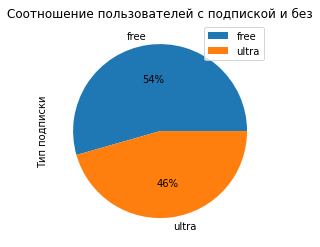

In [25]:
users_go.groupby(by='subscription_type')['subscription_type'].count().plot(y='user_id', kind='pie', autopct='%.0f%%');
plt.ylabel('Тип подписки')
plt.title('Соотношение пользователей с подпиской и без')
plt.legend(loc='upper right')
plt.show()

<br>Как видим, соотношение пользователей с подпиской и без подписки не так уж и велико
<br>Из общего числа пользователей оформили подписку - 45,6%, а не оформили - 54,4%

**3.3 возраст пользователей**

Посмотрим на средний возраст пользователей сервиса

In [26]:
users_go.describe()

,user_id,age
count,1534.000000,1534.000000
mean,767.500000,24.903520
std,442.971971,4.572367
min,1.000000,12.000000
25%,384.250000,22.000000
50%,767.500000,25.000000
75%,1150.750000,28.000000
max,1534.000000,43.000000


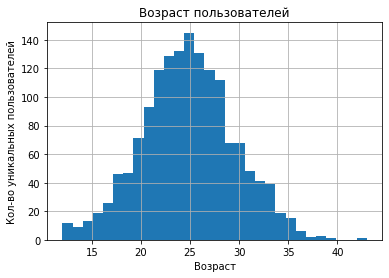

In [27]:
users_go.hist('age', bins=30);
plt.xlabel('Возраст')
plt.ylabel('Кол-во уникальных пользователей')
plt.title('Возраст пользователей')
plt.show()

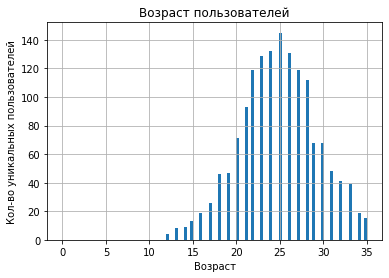

In [28]:
users_go.hist('age', bins=100, range=(0, 35));
plt.xlabel('Возраст')
plt.ylabel('Кол-во уникальных пользователей')
plt.title('Возраст пользователей')
plt.show()

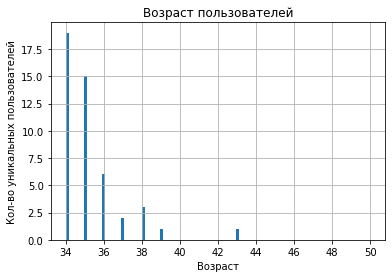

In [29]:
users_go.hist('age', bins=100, range=(34, 50));
plt.xlabel('Возраст')
plt.ylabel('Кол-во уникальных пользователей')
plt.title('Возраст пользователей')
plt.show()

<br>Большее число пользователей в возрасте от 20 до 30 лет включительно
<br>Так же немало пользователей возрастом от 18 до 20 лет и тем, кому немного за тридцать (31-33 года)
<br>Самую малую часть составляют несовершеннолетние (младше 18) и пользователи возрастом старше 34 лет

**3.4 расстояние, которое пользователь преодолел за одну поездку**

Узнаем среднее расстояние, которое пользователи преодолевали за одну поездку

In [30]:
rides_go.distance.describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

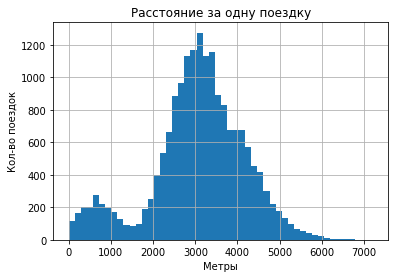

In [31]:
rides_go.hist('distance', bins=50);
plt.xlabel('Метры')
plt.ylabel('Кол-во поездок')
plt.title('Расстояние за одну поездку')
plt.show()

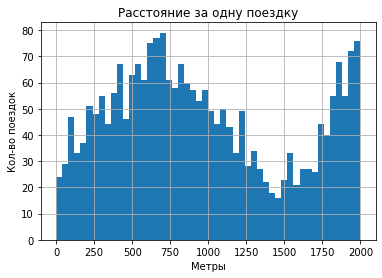

In [32]:
rides_go.hist('distance', bins=50, range=(0, 2000));
plt.xlabel('Метры')
plt.ylabel('Кол-во поездок')
plt.title('Расстояние за одну поездку')
plt.show()

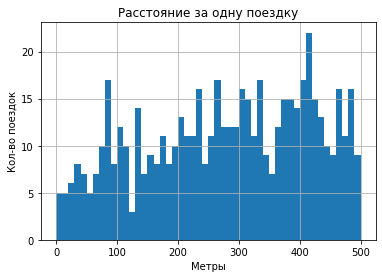

In [33]:
rides_go.hist('distance', bins=50, range=(0, 500));
plt.xlabel('Метры')
plt.ylabel('Кол-во поездок')
plt.title('Расстояние за одну поездку')
plt.show()

<br>Видим, что большая часть поездок была на расстояние приблизительно от 2300 до 4200 м, причем после 4200 м грфик начинает идти на спад.
<br>Нередки и поездки на короткие дистанции (до километра) затем график идет на небольшой спад в районе 1400 м и снова растет, но их количество заметнее меньше.
<br>Есть несколько десятков поездои на расстояния менее 100 метров - их возможные причины опишу в конце след. пункта.

**3.5 продолжительность поездок**

Посмотрим на продолжительность поездок пользователей

In [34]:
rides_go.duration.describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

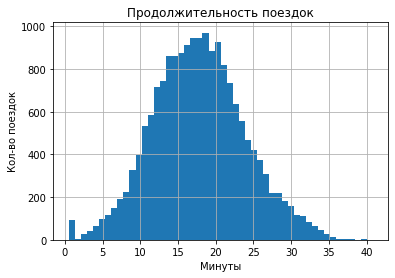

In [35]:
rides_go.hist('duration', bins=50);
plt.xlabel('Минуты')
plt.ylabel('Кол-во поездок')
plt.title('Продолжительность поездок')
plt.show()

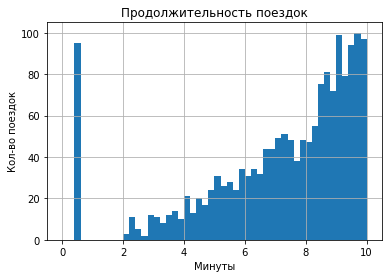

In [36]:
rides_go.hist('duration', bins=50, range=(0, 10));
plt.xlabel('Минуты')
plt.ylabel('Кол-во поездок')
plt.title('Продолжительность поездок')
plt.show()

<br>Средняя продолжительность большинства поездок составляет 12-21 минуту
<br>Много поездок от 8 до 12 минут и от 21 до 27 минут
<br>На их фоне совсем немного поездок до 8 минут и свыше получаса
<br>Так же привлекатет внимание небольшой пик около нуля (немного меньше 100 поездок). Скорее-всего это связано с тем, что пользователи не смогли разобраться с сервисом (а это вполне возможно), их чем-то не удовлетворило состояние самоката, либо они просто передумали пользоваться транспортным средством (тем более, что у пользователей с подпиской старт бесплатный и они вполне могут себе позволить отказаться от поездки)

**Итог**
<br>Исходя из графиков, можно сделать выводы, что сервисом одинаково активно пользуются во всех представленных городах, не считая нашей Столицы. 
<br>Активные/основные пользователи сервиса - это молодые люди от 18 до 31-33 лет.
<br>Большинство поездок у пользователй занимает 12-21 минут на расстояние 2300-4200 км
<br>У 45,6% пользователей имеется подписка - чуть меньше половины от общего числа, что на мой взгляд уже является неплохим показателем.

#### Шаг 4. Объединение данных

Для дальнейшего подсчета выручки и проверки гипотез создадим несколько датафреймов

**4.1 Объединим данные о пользователях, поездках и подписках в один датафрейм**

In [37]:
total_go = users_go.merge(rides_go, how = 'outer')
total_go = total_go.merge(subscriptions_go, how = 'outer')
total_go.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


In [38]:
total_go.head(15)

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
5,1,Кира,22,Тюмень,ultra,2770.890808,16.650138,2021-10-09,10,6,0,199
6,1,Кира,22,Тюмень,ultra,3039.020292,14.927879,2021-10-19,10,6,0,199
7,1,Кира,22,Тюмень,ultra,2842.118050,23.117468,2021-11-06,11,6,0,199
8,1,Кира,22,Тюмень,ultra,3412.690668,15.238072,2021-11-14,11,6,0,199
9,1,Кира,22,Тюмень,ultra,748.690645,15.041884,2021-11-22,11,6,0,199


**4.2 Создадим ещё два датафрейма**

<br>Создадим их из датафрейма, созданного выше. 
<br>1-ая таблица будет c данными о пользователях без подписки;
<br>2-ая - с данными о пользователях с подпиской.

In [39]:
total_free_go = total_go[total_go['subscription_type'] == 'free']

In [40]:
total_ultra_go = total_go[total_go['subscription_type'] == 'ultra']

**4.3 Визуализируем информацию о расстоянии и времени поездок для пользователей обеих категорий**

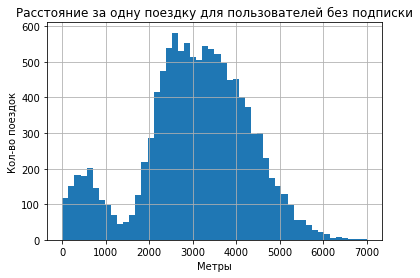

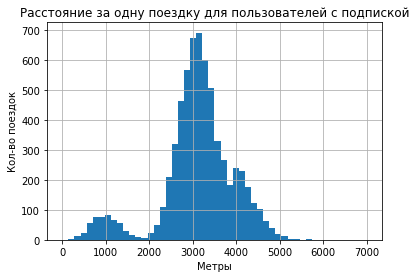

In [41]:
total_free_go.hist('distance', bins=50, range=(0, 7000));
plt.xlabel('Метры')
plt.ylabel('Кол-во поездок')
plt.title('Расстояние за одну поездку для пользователей без подписки')
plt.show()

total_ultra_go.hist('distance', bins=50, range=(0, 7000));
plt.xlabel('Метры')
plt.ylabel('Кол-во поездок')
plt.title('Расстояние за одну поездку для пользователей с подпиской')
plt.show()

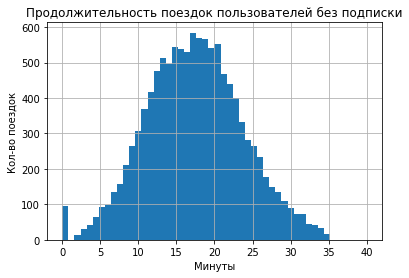

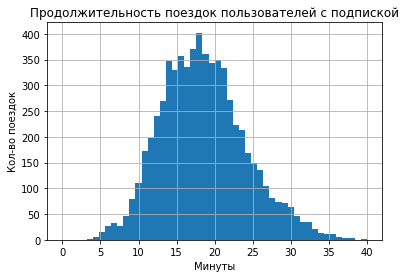

In [42]:
total_free_go.hist('duration', bins=50, range=(0, 40));
plt.xlabel('Минуты')
plt.ylabel('Кол-во поездок')
plt.title('Продолжительность поездок пользователей без подписки')
plt.show()

total_ultra_go.hist('duration', bins=50, range=(0, 40));
plt.xlabel('Минуты')
plt.ylabel('Кол-во поездок')
plt.title('Продолжительность поездок пользователей с подпиской')
plt.show()

**Итог**
<br>Заметно, что графики для пользователей с подпиской уже, чем графики для пользователей без нее, причем разница в среднем расстоянии намного сильнее, нежели в продолжительности
<br>Среднее расстояние, которое преоделевают пользователи без подписок составляет от 2100 до 4400 м, а у пользователей  с подпиской - от 2500 до 3500 м. Так же на обоих графиках виден небольшой "бугор". В первом случае он в отрезке от 0 до 1000 м, а во втором - от 500 до 1500 м
<br>Средняя продолжительность у обоих типов пользователей примерно одинакова (11 - 24 минут). Главнй интерес представляет тот факт, что тот самый пик в нуле, который был упомянут выше, все-таки наблюдается у пользователей без подписки. Видимо, новых пользователей могло что-то не устроить в самокатах сервиса GoFast (технический момент, либо взаимодействие программной начинки самоката с самим сервисом). А, может, они просто испугались ездить на таком 'агрегате'.

#### Шаг 5. Подсчёт выручки

**5.1 Создадим датафрейм с агрегированными данными о поездках**

Создадим мы его на основе датафрейма с объединёнными данными из шага 4. Найдем суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.

In [43]:
total_go_sum = total_go.pivot_table(
    index=['user_id', 'month', 'subscription_type'], 
    values=['distance', 'duration', 'minute_price', 
            'subscription_fee', 'start_ride_price'], 
    aggfunc={'distance' : 'sum', 'duration' : ['sum', 'count'], 
             'start_ride_price': 'mean', 
             'minute_price' : 'mean', 
             'subscription_fee' : 'mean'})

In [44]:
total_go_sum.head(10)

distance duration             \
                                          sum    count        sum   
user_id month subscription_type                                     
1       1     ultra               7027.511294        2  41.416640   
        4     ultra                754.159807        1   6.232113   
        8     ultra               6723.470560        2  44.776802   
        10    ultra               5809.911100        2  31.578017   
        11    ultra               7003.499363        3  53.397424   
        12    ultra               6751.629942        2  27.203912   
2       3     ultra              10187.723006        3  60.959959   
        4     ultra               6164.381824        2  39.048633   
        6     ultra               3255.338202        1  13.851127   
        7     ultra               6780.722964        2  46.170157   

                                minute_price start_ride_price subscription_fee  
                                        mean             mean             mean  
user_id month subscription_type                                                 
1       1     ultra                        6                0              199  
        4     ultra                        6                0              199  
        8     ultra                        6                0              199  
        10    ultra                        6                0              199  
        11    ultra                        6                0              199  
        12    ultra                        6                0              199  
2       3     ultra                        6                0              199  
        4     ultra                        6                0              199  
        6     ultra                        6                0              199  
        7     ultra                        6                0              199

**5.2 Добавим в него столбец с помесячной выручкой, которую принёс каждый пользователь**

Для этого обратитимся к информации об условиях оплаты для подписчиков и и тех, у кого нет подписки. 
<br>Минуты при подсчёте стоимости округлим до ближайшего целого числа.
<br>Помесячную выручку будем считать по формуле: 
<br>стоимость старта поездки * количество поездок + суммарное количество минут * общую продолжительность + стоимость подписки.

In [45]:
total_go_sum['duration'] = round(total_go_sum['duration']).astype('int')

In [46]:
total_go_sum['monthly_revenue'] = total_go_sum['start_ride_price']['mean']*total_go_sum['duration']['count']+total_go_sum['minute_price']['mean']*total_go_sum['duration']['sum']+total_go_sum['subscription_fee']['mean']

In [47]:
total_go_sum.head(10)

distance duration     minute_price  \
                                          sum    count sum         mean   
user_id month subscription_type                                           
1       1     ultra               7027.511294        2  41            6   
        4     ultra                754.159807        1   6            6   
        8     ultra               6723.470560        2  45            6   
        10    ultra               5809.911100        2  32            6   
        11    ultra               7003.499363        3  53            6   
        12    ultra               6751.629942        2  27            6   
2       3     ultra              10187.723006        3  61            6   
        4     ultra               6164.381824        2  39            6   
        6     ultra               3255.338202        1  14            6   
        7     ultra               6780.722964        2  46            6   

                                start_ride_price subscription_fee  \
                                            mean             mean   
user_id month subscription_type                                     
1       1     ultra                            0              199   
        4     ultra                            0              199   
        8     ultra                            0              199   
        10    ultra                            0              199   
        11    ultra                            0              199   
        12    ultra                            0              199   
2       3     ultra                            0              199   
        4     ultra                            0              199   
        6     ultra                            0              199   
        7     ultra                            0              199   

                                monthly_revenue  
                                                 
user_id month subscription_type                  
1       1     ultra                         445  
        4     ultra                         235  
        8     ultra                         469  
        10    ultra                         391  
        11    ultra                         517  
        12    ultra                         361  
2       3     ultra                         565  
        4     ultra                         433  
        6     ultra                         283  
        7     ultra                         475

#### Шаг 6. Проверка гипотез

In [48]:
free = total_go_sum.query('subscription_type == ["free"]')
ultra = total_go_sum.query('subscription_type == ["ultra"]')

**6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то действительно ли пользователи с подпиской «выгоднее» для компании.**
<br>Используем исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

Сформулируем гипотезы
- Н0: время на поездки у пользователей с подпиской и у пользователей без - равны 
- Н1: время на поездки у пользователей с подпиской и у пользователей без - не равны

Используем st.ttest_ind, т.к. сравниваем средние двух генеральных совокупностей между собой

In [49]:
print('cреднее время поездки пользователей с подпиской: ',pd.Series(total_ultra_go['duration']).mean())
print('cреднее время поездки пользователей без подписки: ',pd.Series(total_free_go['duration']).mean())
alpha = .05

results = st.ttest_ind(
    total_ultra_go['duration'], 
    total_free_go['duration'], equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее время поездки пользователей с подпиской:  18.54198516280583
cреднее время поездки пользователей без подписки:  17.39090929866399
p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


Выходит, что пользователи с подпиской в среднем тратят больше времени на поездку, нежели пользователи без подписки

**6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, меньше 3130 метров?**

Сформулируем гипотезы

- Н0: расстояние, которое проезжают пользователи с подпиской за одну поездку, равно 3130 метров
- Н1: расстояние, которое проезжают пользователи с подпиской за одну поездку, не равно 3130 метров

In [53]:
print('cреднее расстояние пользователей с подпиской: ',pd.Series(total_ultra_go['distance']).mean())
optimal_distance = 3130
alpha = 0.05

results = st.ttest_1samp(
    total_ultra_go['distance'], 
    optimal_distance, alternative='less')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cреднее расстояние пользователей с подпиской:  3115.4453880370247
p-значение: 0.08046311521502146
Не получилось отвергнуть нулевую гипотезу


Исходя из результатов теста, расстояние, которое проезжают пользователи с подпиской за одну поездку, действительно, равно иди по крайней мере, очень близко к оптимальному, т.е. в итоге расстояние, которое проезжают пользователи с подпиской за одну поездку, не меньше 3130 метров

**6.3 Будет ли выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.**

Сформулируем гипотезы
- Н0: средняя выручка от пользователей с подпиской равна выручке от пользователей без подписки
- Н1: средняя выручка от пользователей с подпиской не равна выручке от пользователей без подписки

Используем st.ttest_ind, т.к. сравниваем средние двух генеральных совокупностей между собой

In [51]:
monthly_revenue_free = free['monthly_revenue']
monthly_revenue_ultra = ultra['monthly_revenue']

print('cредняя выручка от пользователей с подпиской: ',pd.Series(monthly_revenue_ultra).mean())
print('cредняя выручка от пользователей без подписки: ',pd.Series(monthly_revenue_free).mean())
alpha = 0.05

results = st.ttest_ind(
    monthly_revenue_ultra, 
    monthly_revenue_free, equal_var=False, alternative='greater')

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

cредняя выручка от пользователей с подпиской:  358.5380542686962
cредняя выручка от пользователей без подписки:  321.7840541335687
p-значение: 2.3492186178087955e-47
Отвергаем нулевую гипотезу


Выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки

**6.4 Представим такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест нам понадобился бы для проверки этой гипотезы?**

Сформулируем гипотезы
- Н0: количество обращений в техподдержку до обновления и после - равны
- Н1: количество обращений в техподдержку до обновления и после - не равны

Применяем scipy.stats.ttest_rel(), т.к. анализируем одну генеральную совокупность, с которой произошли некоторые изменения.

**Общий Вывод:**
<br>Мы проанализировали данные от сервиса GoFast и проверили некоторые гипотезы.
<br>Данные были предобработаны, проверены на наличие пропущенных значений и дубликаты
<br>Была описана и визуализирована общая информация о пользователях и поездках
<br>В последующем все данные были объеденены в один датафрейм, благодаря которому были распределены данные по пользователем с подпиской и без по отдельности
<br>Была создана сводная таблица  с агрегированными данными о поездках на основе датафрейма с объединёнными данными, а так же подсчитана помесячная выручка, котрую мы добавили в отдельный столбец
<br>Проверили все стоящие перед нами гипотезы.
Оказалось, что:
- пользователи с подпиской тратят больше времени на поездки, нежели пользователи без подписки
- расстояние, которое проезжают пользователи с подпиской за одну поездку, не меньше 3130 метров
- выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки